In [ ]:
from astropy import units as u
from astropy import constants as const
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving exoplanet.eu_catalog.csv to exoplanet.eu_catalog (2).csv


In [ ]:
tab = Table.read('exoplanet.eu_catalog.csv')
tab.colnames

['# name',
 'planet_status',
 'mass',
 'mass_error_min',
 'mass_error_max',
 'mass_sini',
 'mass_sini_error_min',
 'mass_sini_error_max',
 'radius',
 'radius_error_min',
 'radius_error_max',
 'orbital_period',
 'orbital_period_error_min',
 'orbital_period_error_max',
 'semi_major_axis',
 'semi_major_axis_error_min',
 'semi_major_axis_error_max',
 'eccentricity',
 'eccentricity_error_min',
 'eccentricity_error_max',
 'inclination',
 'inclination_error_min',
 'inclination_error_max',
 'angular_distance',
 'discovered',
 'updated',
 'omega',
 'omega_error_min',
 'omega_error_max',
 'tperi',
 'tperi_error_min',
 'tperi_error_max',
 'tconj',
 'tconj_error_min',
 'tconj_error_max',
 'tzero_tr',
 'tzero_tr_error_min',
 'tzero_tr_error_max',
 'tzero_tr_sec',
 'tzero_tr_sec_error_min',
 'tzero_tr_sec_error_max',
 'lambda_angle',
 'lambda_angle_error_min',
 'lambda_angle_error_max',
 'impact_parameter',
 'impact_parameter_error_min',
 'impact_parameter_error_max',
 'tzero_vr',
 'tzero_vr_error_m

In [ ]:
x = tab['mass']
y = tab['radius']
pcolor = tab['star_teff']
sma_au = tab['semi_major_axis']
star_r = tab["star_radius"]

0.48538011695906436
0.18421052631578946
0.30116959064327486
0.4064327485380117
0.10818713450292394


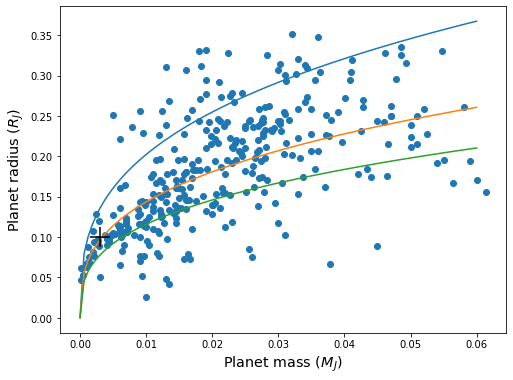

In [ ]:
plt.figure(figsize=(8,6))
cmap = plt.cm.get_cmap('jet')
#sc = plt.scatter(x, y, c=pcolor, cmap=cmap)
sc = plt.scatter(x, y, cmap=cmap, vmin=2000, vmax=6000)
plt.scatter(0.003,0.1,marker='+', s=400, color='k', zorder=5, label='Earth')
plt.xlabel('Planet mass ($M_J$)', fontsize='x-large')
plt.ylabel('Planet radius ($R_J$)', fontsize='x-large')
Mass = np.linspace(0,0.06,num=100)
Mass_si = Mass * const.M_jup
rho1 = 1500*u.kg/u.m**3
rho2 = 4200*u.kg/u.m**3
rho3 = 8000*u.kg/u.m**3
Radius_si = (3*Mass_si/(4*np.pi*rho1))**(1/3)
Radius_si2 = (3*Mass_si/(4*np.pi*rho2))**(1/3)
Radius_si3 = (3*Mass_si/(4*np.pi*rho3))**(1/3)
Radius = Radius_si / const.R_jup
Radius2 = Radius_si2 / const.R_jup
Radius3 = Radius_si3 / const.R_jup
plt.plot(Mass,Radius)
plt.plot(Mass,Radius2)
plt.plot(Mass,Radius3)
yvalue_compare = (3*xvalue*const.M_jup/(4*np.pi*rho1))**(1/3)/const.R_jup
count1 = 0.0
count2 = 0.0
count3 = 0.0
for i in range(len(xvalue)):
  if 3*xvalue[i] * const.M_jup / (4*np.pi * (yvalue[i] * const.R_jup) ** 3) >= 8000*u.kg/u.m**3:
    count1 += 1
  if 3*xvalue[i] * const.M_jup / (4*np.pi * (yvalue[i] * const.R_jup) ** 3) >= 4200*u.kg/u.m**3:
    count2 += 1
  if 3*xvalue[i] * const.M_jup / (4*np.pi * (yvalue[i] * const.R_jup) ** 3) >= 1500*u.kg/u.m**3:
    count3 += 1
count3 -= count2
count2 -= count1
fraction2 = count2/len(xvalue)
fraction3 = count3/len(xvalue)
fraction = count1/len(xvalue)
print(fraction + fraction2)
print(fraction)
print(fraction2)
print(fraction3)
print(1-fraction-fraction2-fraction3)

5495.021865555212 kg / m3
0.34502923976608185


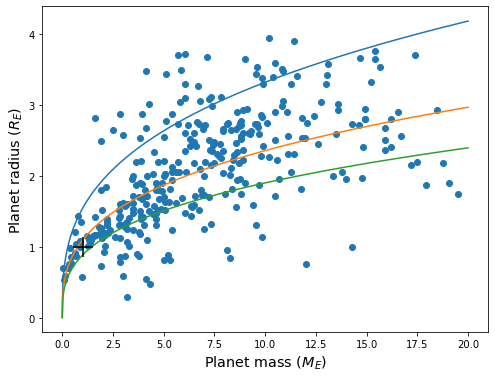

In [ ]:
plt.figure(figsize=(8,6))
cmap = plt.cm.get_cmap('jet')
#sc = plt.scatter(xvalue, yvalue, c=pcolor, cmap=cmap)
sc = plt.scatter(xvalue * const.M_jup / const.M_earth, yvalue* const.R_jup / const.R_earth, cmap=cmap, vmin=2000, vmax=6000)
plt.scatter(1,1,marker='+', s=400, color='k', zorder=5, label='Earth')
plt.xlabel('Planet mass ($M_E$)', fontsize='x-large')
plt.ylabel('Planet radius ($R_E$)', fontsize='x-large')
Mass = np.linspace(0,20,num=1000)
Mass_si = Mass * const.M_earth
rho1 = 1500*u.kg/u.m**3
rho2 = 4200*u.kg/u.m**3
rho3 = 8000*u.kg/u.m**3
Radius_si = (3*Mass_si/(4*np.pi*rho1))**(1/3)
Radius_si2 = (3*Mass_si/(4*np.pi*rho2))**(1/3)
Radius_si3 = (3*Mass_si/(4*np.pi*rho3))**(1/3)
Radius = Radius_si / const.R_earth
Radius2 = Radius_si2 / const.R_earth
Radius3 = Radius_si3 / const.R_earth

plt.plot(Mass,Radius)
plt.plot(Mass,Radius2)
plt.plot(Mass,Radius3)
rho_e = 3 * const.M_earth / (4*np.pi *  const.R_earth ** 3)
print(rho_e)
count = 0.0
for i in range(len(xvalue)):
  if 3*xvalue[i] * const.M_jup / (4*np.pi * (yvalue[i] * const.R_jup) ** 3) >= rho_e:
    count += 1
fraction = count/len(xvalue)
print(fraction)

    star_teff     
------------------
 1825.914361278778
 855.5949624513138
1666.6447038969497
                --
 540.1931313197624
319.58256631701227
 419.0286708102929
 528.7865167822414
   522.20388707644
  996.491133056858
               ...
1024.1685721306367
  366.423800241236
 313.1670757206592
263.77176993055633
 230.1162459834577
200.51817774355956
181.86638448091867
153.87583736017962
  881.390479052136
1987.8638655196555
 1078.755727391678
Length = 342 rows
5495.021865555212 kg / m3
0.34502923976608185


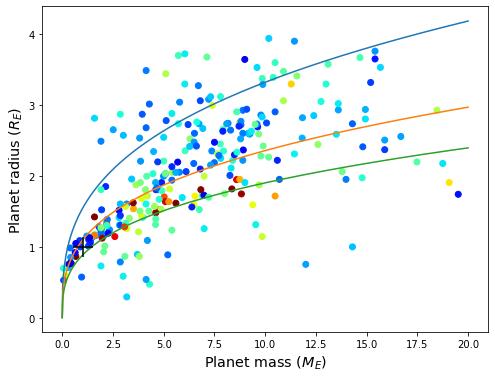

In [ ]:
plt.figure(figsize=(8,6))
cmap = plt.cm.get_cmap('jet')
#sc = plt.scatter(xvalue, yvalue, c=pcolor, cmap=cmap)
t_equi = pcolor * (0.7 ** 0.25) * (star_r * const.R_sun / 2 / sma_au / const.au) ** 0.5
print(t_equi)
sc = plt.scatter(xvalue * const.M_jup / const.M_earth, yvalue* const.R_jup / const.R_earth, c=t_equi, cmap=cmap, vmin=10, vmax=2000)
plt.scatter(1,1,marker='+', s=400, color='k', zorder=5, label='Earth')
plt.xlabel('Planet mass ($M_E$)', fontsize='x-large')
plt.ylabel('Planet radius ($R_E$)', fontsize='x-large')
Mass = np.linspace(0,20,num=1000)
Mass_si = Mass * const.M_earth
rho1 = 1500*u.kg/u.m**3
rho2 = 4200*u.kg/u.m**3
rho3 = 8000*u.kg/u.m**3
Radius_si = (3*Mass_si/(4*np.pi*rho1))**(1/3)
Radius_si2 = (3*Mass_si/(4*np.pi*rho2))**(1/3)
Radius_si3 = (3*Mass_si/(4*np.pi*rho3))**(1/3)
Radius = Radius_si / const.R_earth
Radius2 = Radius_si2 / const.R_earth
Radius3 = Radius_si3 / const.R_earth

plt.plot(Mass,Radius)
plt.plot(Mass,Radius2)
plt.plot(Mass,Radius3)
yvalue_compare = (3*xvalue*const.M_earth/(4*np.pi*rho1))**(1/3)/const.R_earth
rho_e = 3 * const.M_earth / (4*np.pi *  const.R_earth ** 3)
print(rho_e)
count = 0.0
for i in range(len(xvalue)):
  if 3*xvalue[i] * const.M_jup / (4*np.pi * (yvalue[i] * const.R_jup) ** 3) >= rho_e:
    count += 1

fraction = count/len(xvalue)
print(fraction)